In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
raw_data = pd.read_csv("C:\\Users\\yume\\Desktop\\LinearRegression_Jupyter\\2.01. Admittance.csv")

In [9]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [12]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1, "No":0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


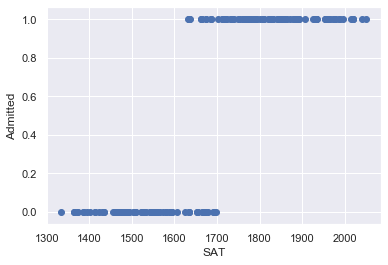

In [15]:
y = data['Admitted']
x1 = data['SAT']
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

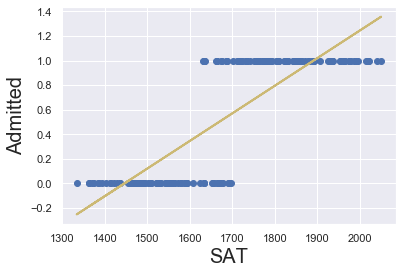

In [19]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y)
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat, lw =2, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()


### plot with logistic curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


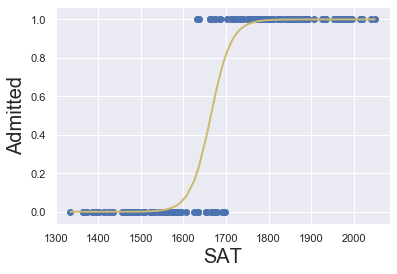

In [21]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.plot(x_sorted,f_sorted, lw =2, color = 'C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()
